# In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='dark')

In [91]:
from sklearn.datasets import load_boston

In [92]:
boston = load_boston()

In [93]:
boston_data = pd.DataFrame(boston.data,columns=boston.feature_names)

In [94]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [95]:
targets = boston.target

In [96]:
# targets

In [97]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [98]:
def plot_distplot(dataset):
    plt.figure(figsize=(26,20))
    plotno = 1
    for i in dataset.columns:
        plt.subplot(4,4,plotno)
        sns.distplot(dataset[i], label=i)
        plt.xlabel(i)
        plt.legend()
        plt.tight_layout()
        plotno +=1
        

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


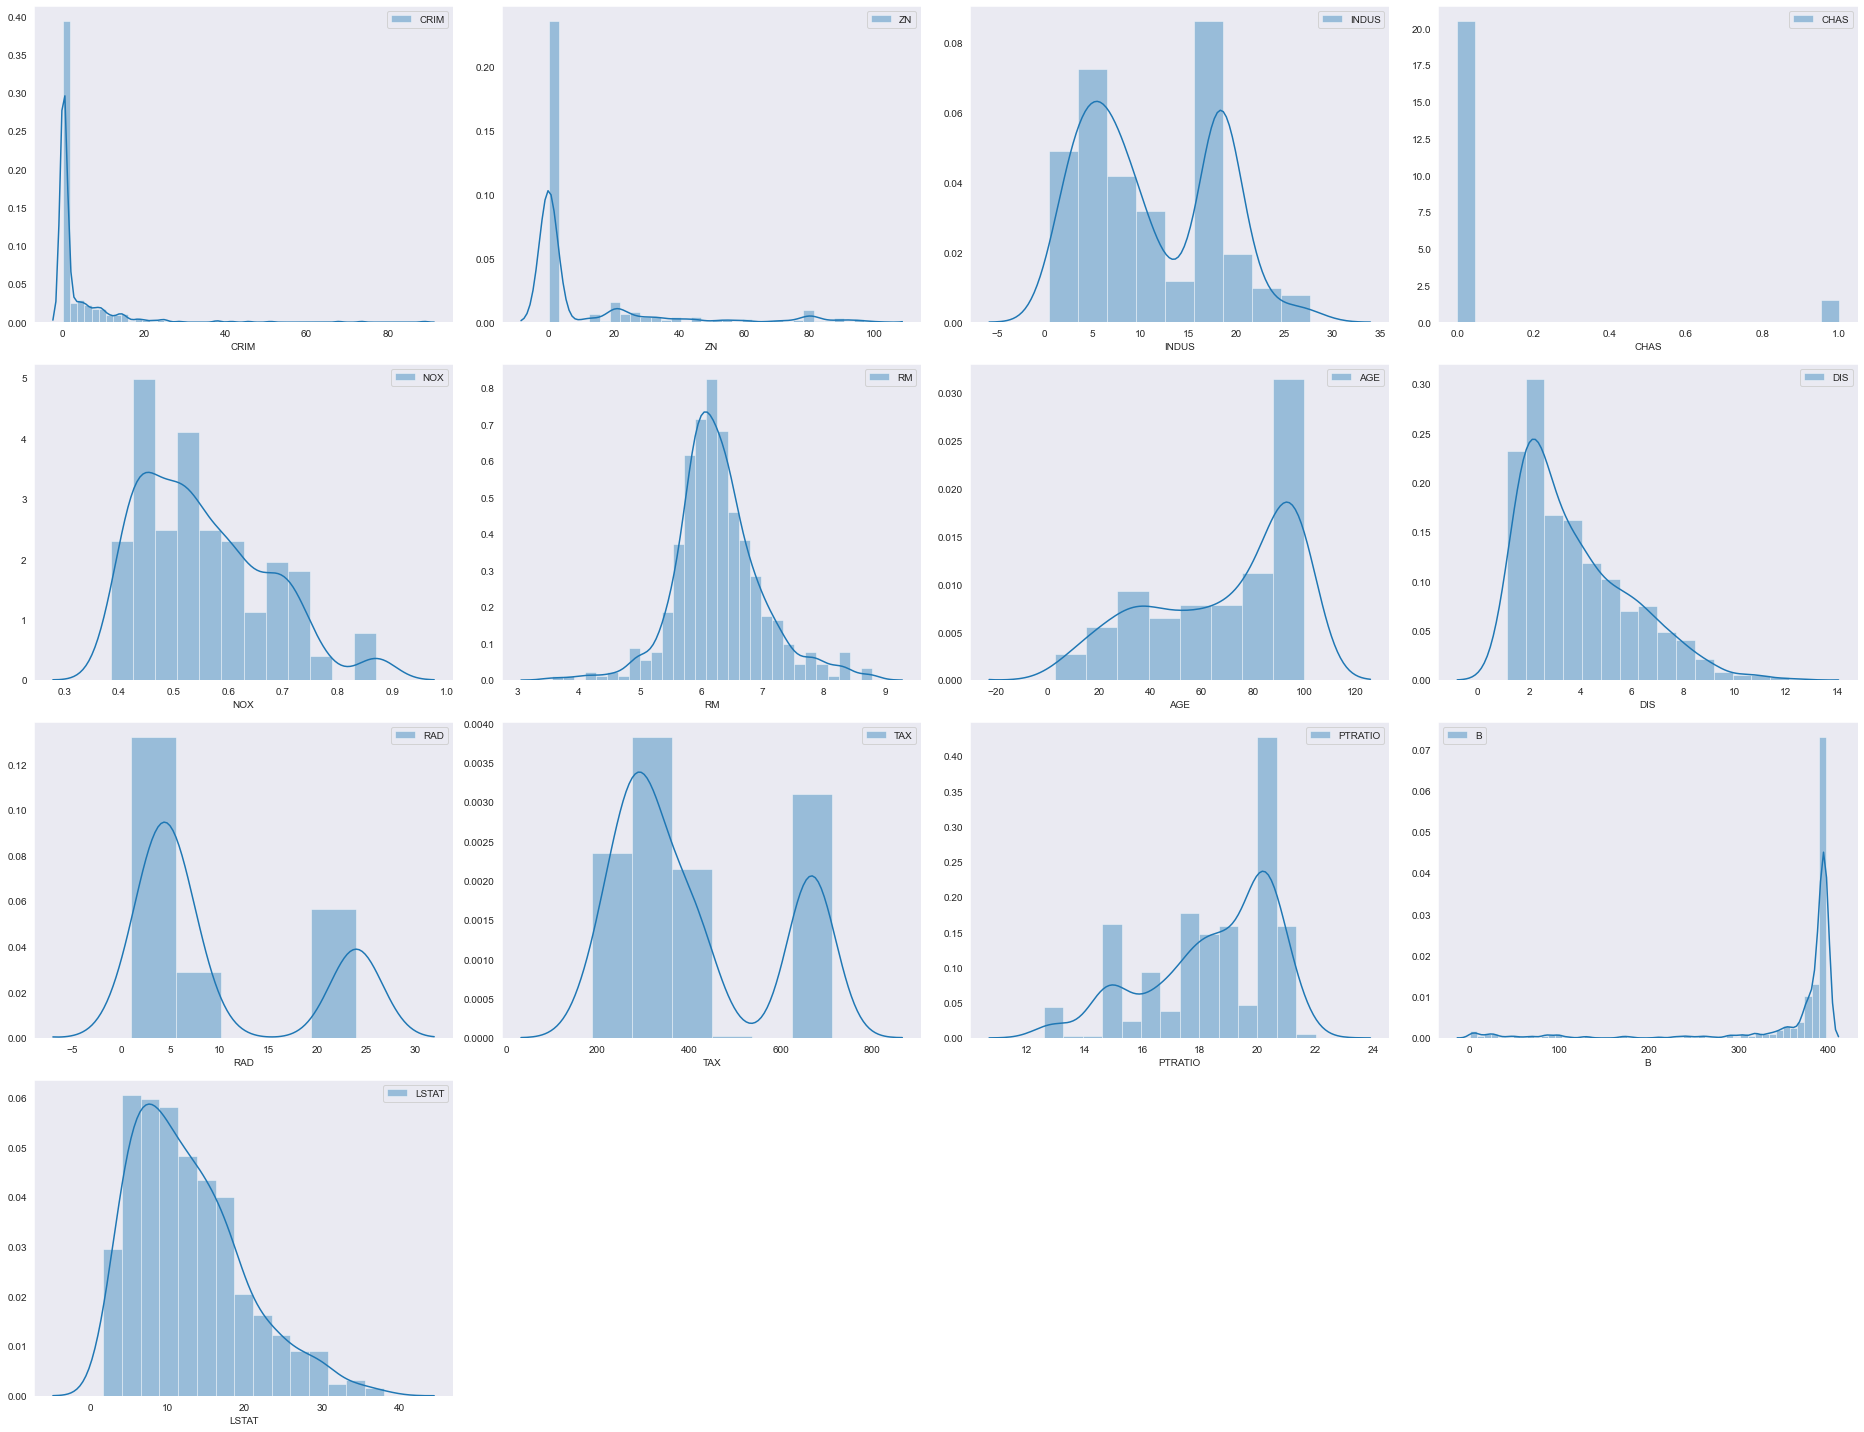

In [99]:
plot_distplot(boston_data)

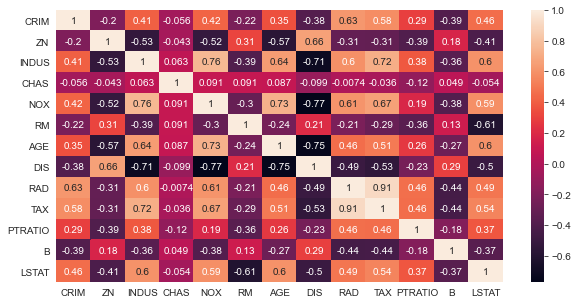

In [100]:
plt.figure(figsize=(10,5))
sns.heatmap(boston_data.corr(), annot=True)

In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [102]:
X = boston_data

In [103]:
y = targets

In [104]:
st = StandardScaler()

In [105]:
X = pd.DataFrame(st.fit_transform(X), columns=boston_data.columns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


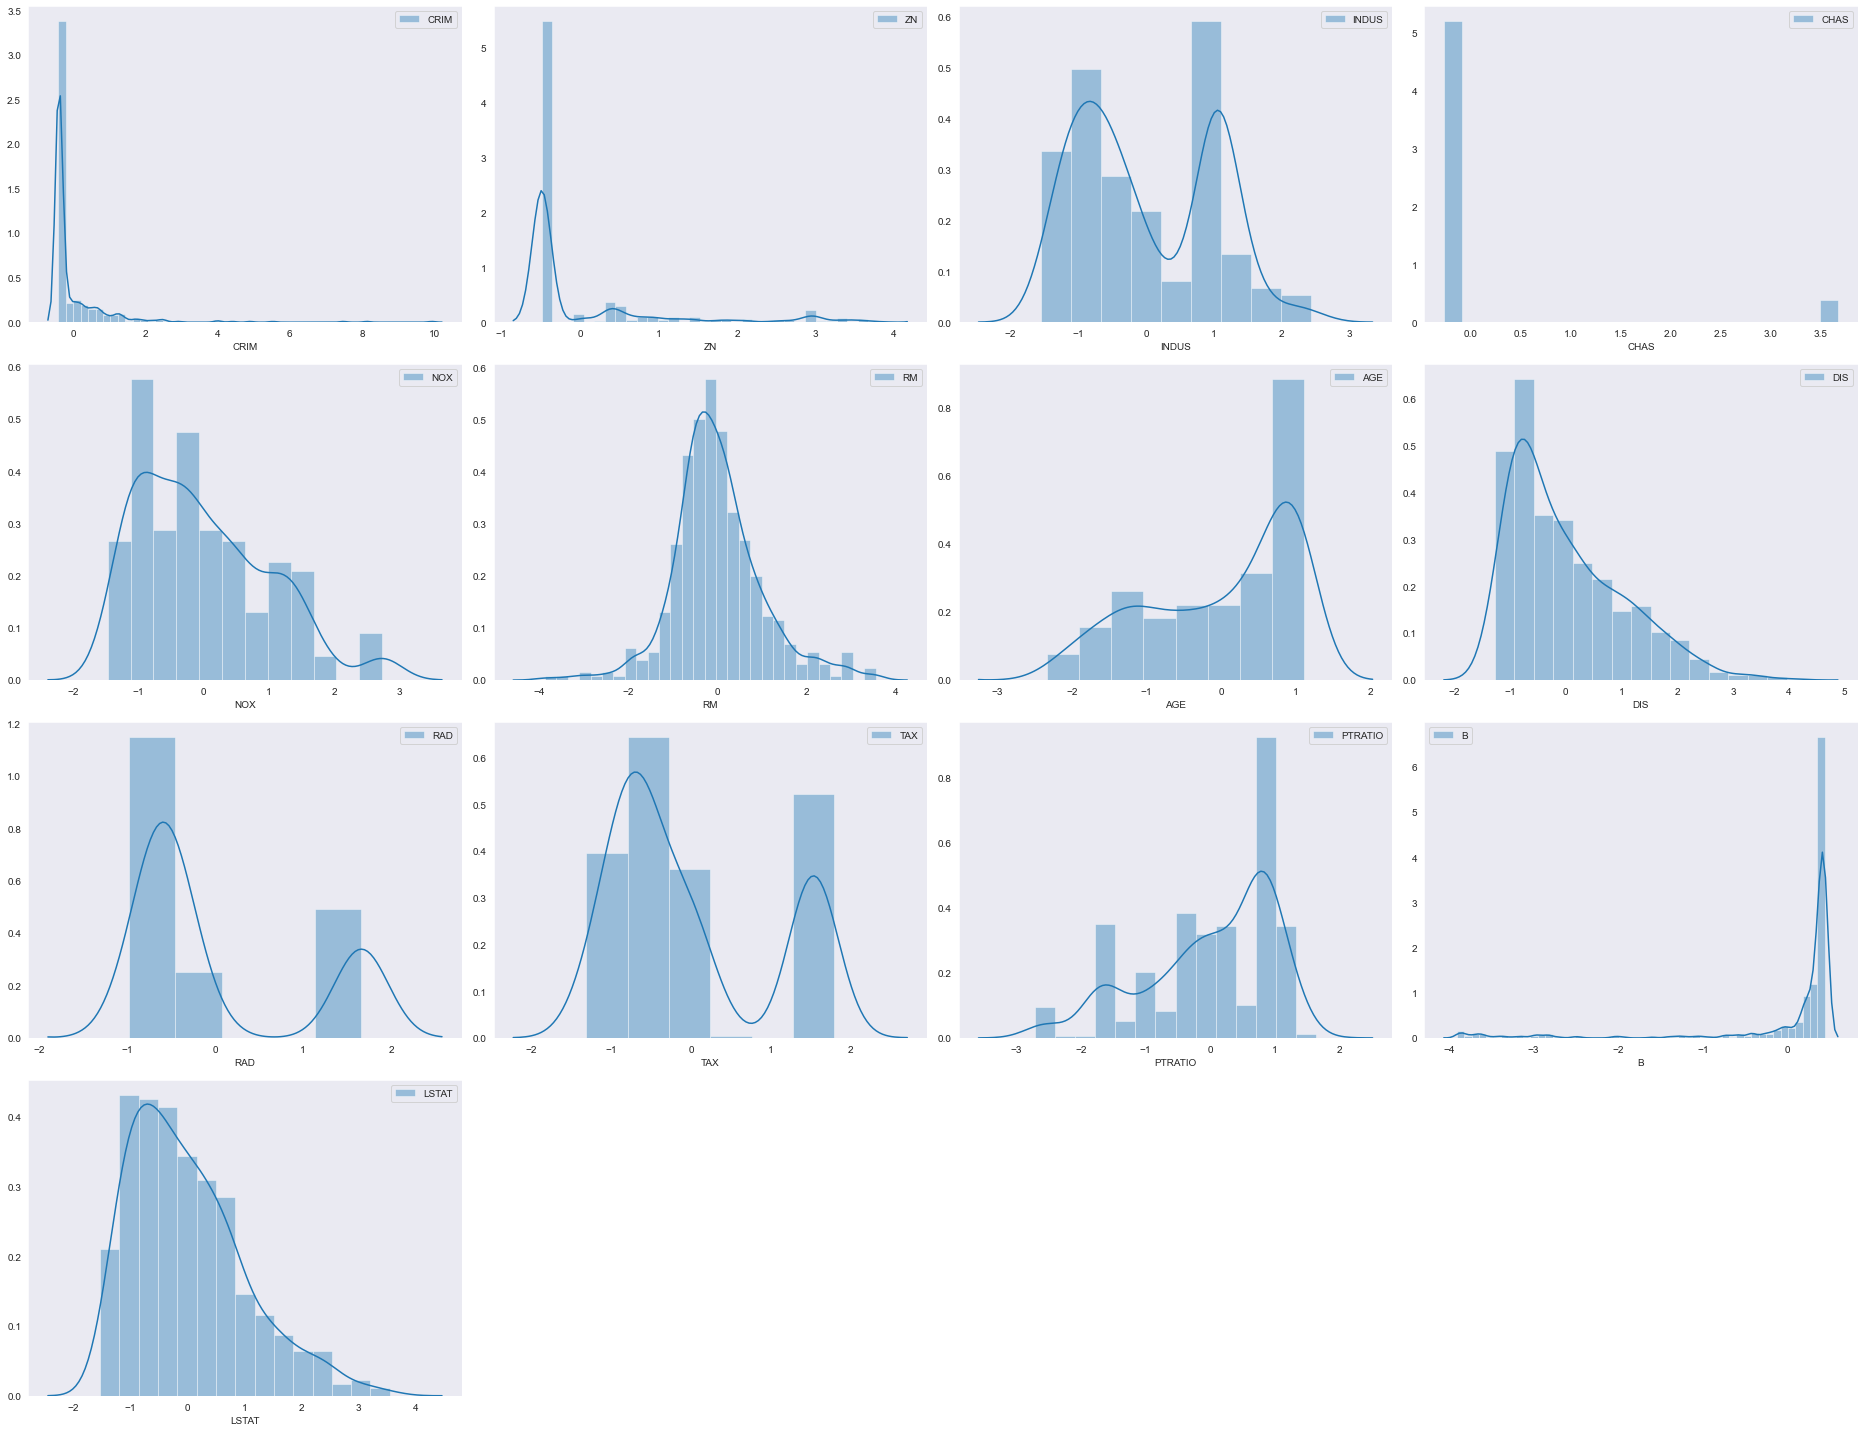

In [106]:
plot_distplot(X)

In [107]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [109]:
randomForest = RandomForestRegressor(n_estimators=180, n_jobs=-1, oob_score=True)

In [110]:
randomForest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=180, n_jobs=-1, oob_score=True)

In [111]:
y_pred_rf = randomForest.predict(X_test)

In [113]:
from sklearn.metrics import r2_score

In [114]:
print(r2_score(y_test, y_pred_rf))

0.8600198789713454


In [115]:
print(randomForest.oob_score_)

0.8742395539839316


In [116]:
# lest use grid searchCV
from sklearn.model_selection import GridSearchCV

In [117]:
params = {'min_samples_split':[2,3,4,5], 'n_estimators' :[150,180,200,250,270]}

In [118]:
gridCV = GridSearchCV(estimator=randomForest, param_grid=params, cv=5, n_jobs=-1, verbose=5)

In [119]:
gridCV.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.2s finished


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=180, n_jobs=-1,
                                             oob_score=True),
             n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [150, 180, 200, 250, 270]},
             verbose=5)

In [120]:
gridCV.best_score_

0.8478966253275667

In [121]:
gridCV.best_params_

{'min_samples_split': 2, 'n_estimators': 200}

In [122]:
rf_final = RandomForestRegressor(n_estimators=200)

In [123]:
rf_final.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [124]:
y_pred_final = rf_final.predict(X_test)

In [125]:
print(r2_score(y_test, y_pred_final))

0.8682113820389692


In [126]:
#lests plot the result

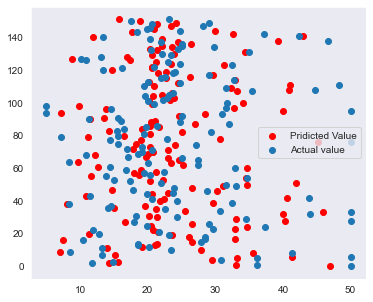

In [127]:
plt.figure(figsize=(6,5))
plt.scatter(y_pred_final, range(0,len(y_pred_final)), color='red', label='Pridicted Value')
plt.scatter(y_test, range(0,len(y_test)), label='Actual value')
plt.legend()

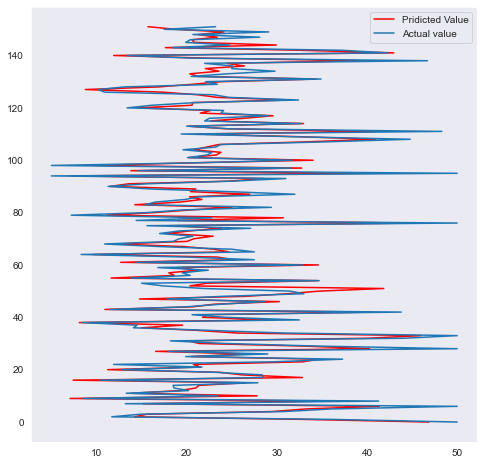

In [128]:
plt.figure(figsize=(8,8))
plt.plot(y_pred_final, range(0,len(y_pred_final)), color='red', label='Pridicted Value')
plt.plot(y_test, range(0,len(y_test)), label='Actual value')
plt.legend(loc='best')